# Admission data


### Project goal
Main goal of this project is to develop machine learning and deep learning regression taht predicts the probability in range from 0 to 1 that student will be accepted to the school based on various application conditions.

#### The dataset is from Kaggle containing information about 500 applicants from various universities and their chance of getting admitted

## Imports

1.First imports

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats


colors = ['#F06E5C','#5CF0C5','#F1F689','#F0B35C','#6EDEDE',
          '#BB81D5','#D3D972','#EB83EE','#8B8CED','#F09674',
          '#BCE374','#72C3E7','#C3A0EB','#E6809D','#A9BFCB']

## Load dataset

In [4]:
df = pd.read_csv('admissions_data.csv')

Next, let’s load in the admission data to start exploring.

Print the first few rows. 

In [83]:
df.head(10)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45


How many columns (features) does the data contain?

In [84]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB
None


Total 9 columns and 500 obseravtions. No null entries in dataset. 

In [85]:
print(len(df)) # 500 observations

500


In [86]:
print(df.columns)

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')


dependent variables - output: chance of admission (range from 0 to 1)

The Dataset includes nine different columns as below:

* Serial No.: Index of each row (1-500)
* GRE Score: GRE test score (out of 340)
* TOEFL Score: TOEFL test score (out of 120)
* University Rating: Evaluated university rating (out of 5)
* SOP: Statement of Purpose Strength (out of 5)
* LOR: Letter of Recommendation Strength (out of 5)
* CGPA: Undergraduate GPA (out of 10)
* Research: Has research experience (either 0 or 1)
* Chance of Admit: Applicant’s chance of being admitted (ranging from 0 to 1)

Do any of the columns in the data contain null (missing) values?

In [87]:
print(df.isna().sum()) # no missing data

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64


Lets calculate summary statistics on admission_data using the .describe() method.

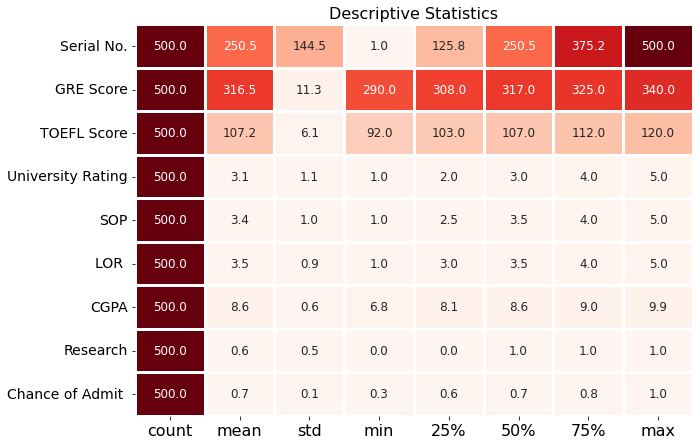

In [6]:
def desc_stats(dataframe):
    desc= dataframe.describe().T
    desc_df = pd.DataFrame(index = [col for col in dataframe.columns], columns =desc.columns, data= desc)
    f, ax = plt.subplots(figsize=(10, desc_df.shape[0]*0.8))
    sns.heatmap(desc_df, annot=True, cmap = 'Reds', fmt='.1f', ax=ax, linewidths = 2.6, cbar=False, annot_kws ={'size': 12})
    plt.xticks(size=16)
    plt.yticks(size=14, rotation=0)
    plt.title('Descriptive Statistics', size=16)
    plt.show()
    
desc_stats(df)

In [89]:
quantile_25 = df.quantile(0.25)
quantile_75 = df.quantile(0.75)
diff_q = quantile_75 - quantile_25
off_values = ((df < (quantile_25 - 1.5*diff_q)) | (df > (quantile_75 + 1.5*diff_q))).sum()
print(off_values)

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  1
CGPA                 0
Research             0
Chance of Admit      2
dtype: int64


<AxesSubplot:xlabel='Columns', ylabel='Values'>

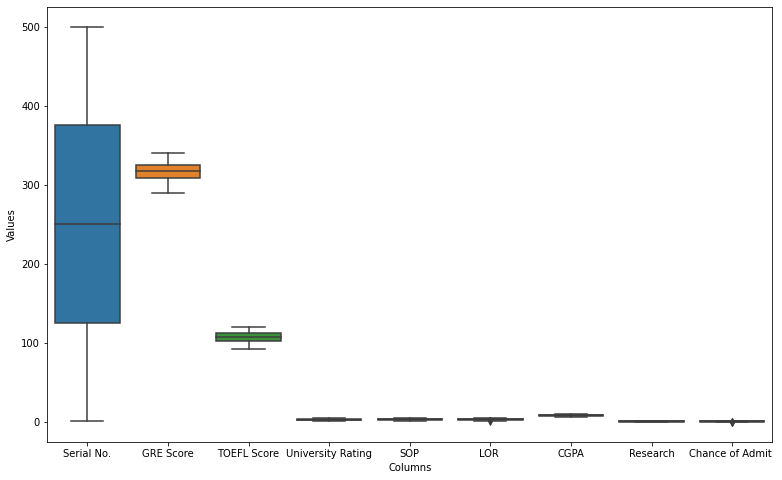

In [90]:
plt.figure(figsize = (13,8))
plt.ylabel('Values')
plt.xlabel('Columns')
sns.boxplot(data= df)

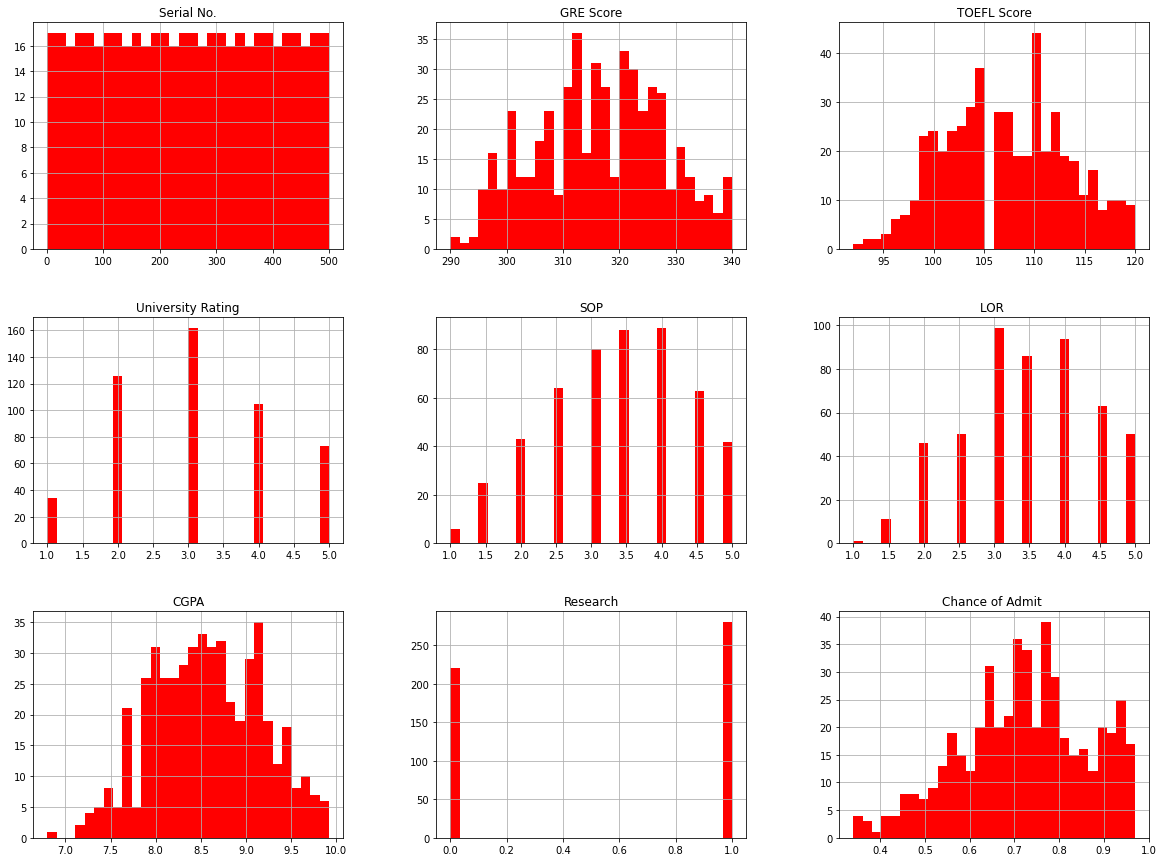

In [91]:

df.hist(bins=30, figsize=(20,15), color='red')
plt.show()

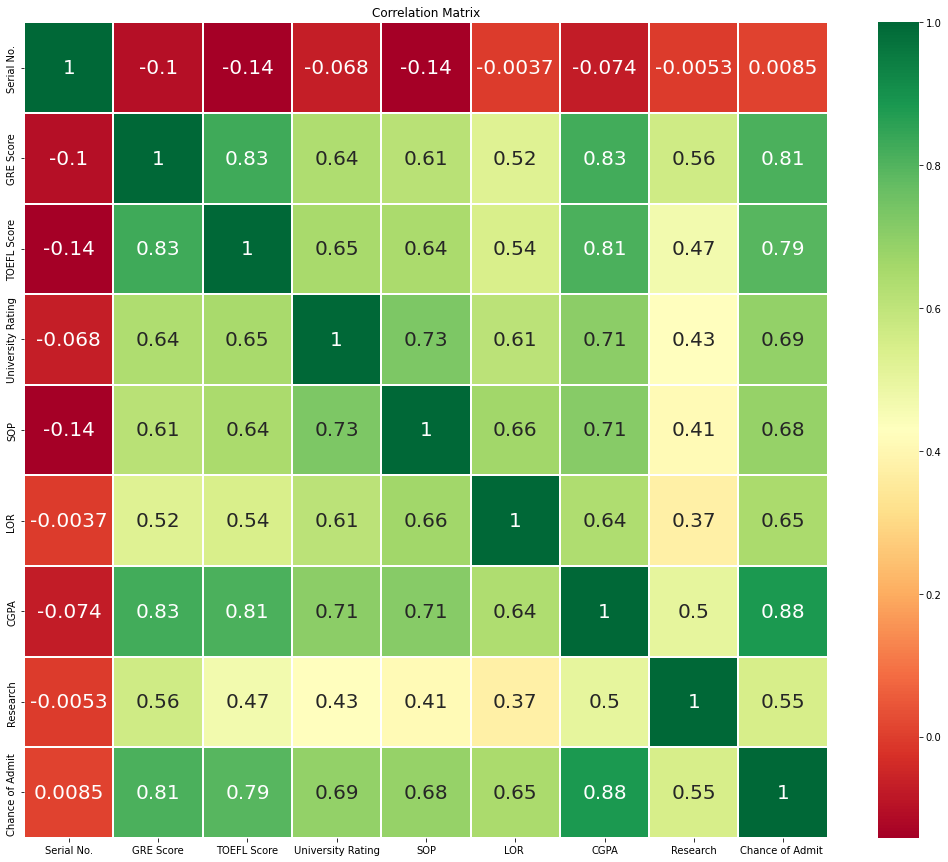

In [92]:
plt.figure(figsize=(18,15))
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn', linewidths=0.2, annot_kws={'size':20})
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.title('Correlation Matrix')
plt.show()

GRE, GPA, toefl Score is highly correlated with chance of admit. 

In [160]:

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression #linear Regression

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [131]:
x_train=df.iloc[0:400,:-1].values
y_train= df.iloc[0:400,-1].values
x_test=df.iloc[400:500,:-1].values
y_test= df.iloc[400:500,-1].values

In [132]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [163]:
model = LinearRegression()
model.fit(x_train, y_train)
pred_1 = model.predict(x_test)
print("The accuracy of the Linear Regression is ", model.score(x_test, y_test))
r2 = r2_score(y_test, pred_1)
MAE = mean_absolute_error(y_test,pred_1)
MSE = mean_squared_error(y_test, pred_1)
RMSE = format(np.sqrt(MSE), '.2f')
print("R2: ", r2)
print('MAE: ', MAE)
print('MSE: ', MSE)
print('RMSE: ', RMSE)



The accuracy of the Linear Regression is  0.8154234603841047
R2:  0.8154234603841047
MAE:  0.046782773525333325
MSE:  0.0033447686931069188
RMSE:  0.06


In [164]:
model2 = DecisionTreeRegressor(random_state = 0)
model2.fit(x_train, y_train)
pred_2 = model2.predict(x_test)
print("The accuracy of the Linear Regression is ", model2.score(x_test, y_test))
r2 = r2_score(y_test, pred_2)
MAE = mean_absolute_error(y_test,pred_2)
MSE = mean_squared_error(y_test, pred_2)
RMSE = format(np.sqrt(MSE), '.2f')
print("R2: ", r2)
print('MAE: ', MAE)
print('MSE: ', MSE)
print('RMSE: ', RMSE)


The accuracy of the Linear Regression is  0.5525709785881927
R2:  0.5525709785881927
MAE:  0.06379999999999998
MSE:  0.008107999999999995
RMSE:  0.09


In [165]:
model3 = RandomForestRegressor(n_estimators = 100, random_state=0)
model3.fit(x_train, y_train)
pred_3 = model3.predict(x_test)

print("The accuracy of the Linear Regression is ", model3.score(x_test, y_test))
r2 = r2_score(y_test, pred_3)
MAE = mean_absolute_error(y_test,pred_3)
MSE = mean_squared_error(y_test, pred_3)
RMSE = format(np.sqrt(MSE), '.2f')
print("R2: ", r2)
print('MAE: ', MAE)
print('MSE: ', MSE)
print('RMSE: ', RMSE)

The accuracy of the Linear Regression is  0.8518596503232939
R2:  0.8518596503232939
MAE:  0.03686399999999992
MSE:  0.0026844971999999906
RMSE:  0.05


Text(0.5, 0, 'test')

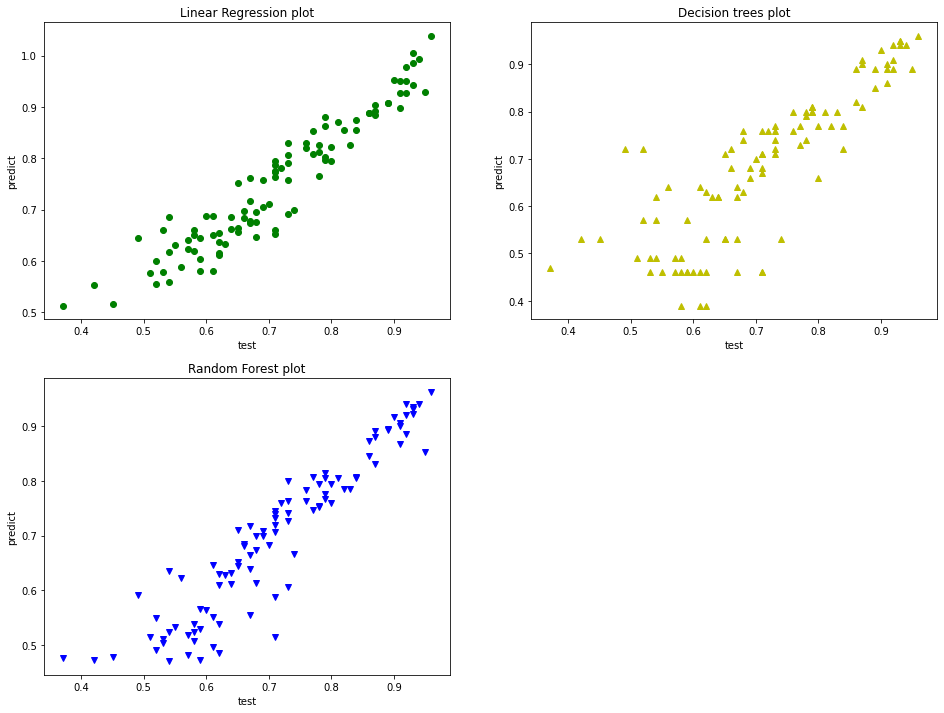

In [159]:
plt.figure(figsize= (16,12))
plt.subplot(221)
plt.plot(y_test, pred_1,'o', color = 'g')
plt.title('Linear Regression plot')
plt.ylabel("predict")
plt.xlabel("test")

plt.subplot(222)
plt.plot(y_test, pred_2, '^', color = 'y')
plt.title('Decision trees plot')
plt.ylabel("predict")
plt.xlabel("test")

plt.subplot(223)
plt.plot(y_test, pred_3, 'v', color = 'b')
plt.title('Random Forest plot')
plt.ylabel("predict")
plt.xlabel("test")


## Deep Learning Regression with Admissions Data

In [166]:
import tensorflow as tf
from tensorflow	import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import r2_score

In [184]:
def design_model(features):
  model = Sequential(name = "my_first_model")
  #without hard-coding
  input = InputLayer(input_shape=(features.shape[1],)) 
  #add the input layer
  model.add(input) 
  #add a hidden layer with 128 neurons
  model.add(Dense(200, activation='relu')) 
  #add an output layer to our model
  model.add(Dense(1)) 
  opt = Adam(learning_rate=0.01)
  model.compile(loss='mse',  metrics=['mae'], optimizer=opt)
  return model


In [186]:

labels = df.iloc[:, -1]
features = df.iloc[:, 0:-1]
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.33, random_state=42)
#normalize
numerical_features = features.select_dtypes(include=['float64', 'int64'])
numerical_columns = numerical_features.columns
 #standartize
ct=ColumnTransformer([('standartize',StandardScaler(),numerical_columns)],remainder='passthrough')

features_train = ct.fit_transform(features_train)
features_test = ct.transform(features_test)


model = design_model(features_train)
print(model.summary())
stop = EarlyStopping(monitor = 'val_loss',mode='min',patience = 40)
history = model.fit(features_train, labels_train, epochs=100, batch_size=50, verbose=1, validation_split=.2, callbacks=[stop])
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

val_mse, val_mae = model.evaluate(features_test, labels_test, verbose=0)

print('MAE:' , val_mae)
print('MSE: ' , val_mse)

predicted_values = model.predict(features_test) 
print(r2_score(labels_test, predicted_values)) 
hist.tail(10)


Model: "my_first_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 200)               1800      
                                                                 
 dense_17 (Dense)            (None, 1)                 201       
                                                                 
Total params: 2,001
Trainable params: 2,001
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
6/6 [==============================] - 1s 52ms/step - loss: 0.1933 - mae: 0.3352 - val_loss: 0.0989 - val_mae: 0.2667
Epoch 2/100
6/6 [==============================] - 0s 10ms/step - loss: 0.0861 - mae: 0.2350 - val_loss: 0.0399 - val_mae: 0.1614
Epoch 3/100
6/6 [==============================] - 0s 14ms/step - loss: 0.0364 - mae: 0.1506 - val_loss: 0.0259 - val_mae: 0.1338
Epoch 4/100
6/6 [==============================] - 

,loss,mae,val_loss,val_mae,epoch
58,0.000995,0.024420,0.003642,0.046183,58
59,0.000877,0.022588,0.003809,0.047329,59
60,0.000881,0.021883,0.004742,0.050460,60
61,0.001262,0.026784,0.004704,0.051614,61
62,0.001223,0.026661,0.004726,0.052562,62
63,0.001168,0.026006,0.005103,0.052799,63
64,0.001310,0.026823,0.004199,0.047763,64
65,0.000941,0.023066,0.004115,0.048344,65
66,0.000861,0.022245,0.003385,0.042904,66
67,0.000802,0.021393,0.004043,0.047339,67


In [200]:
print("R2 score is: ", r2_score(labels_test, predicted_values))

R2 score is:  0.7835212146831446


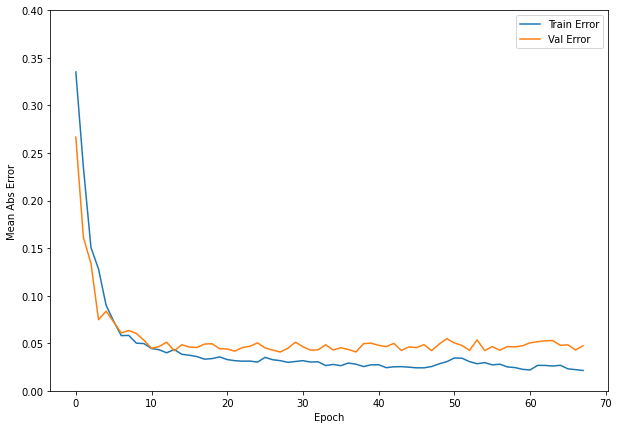

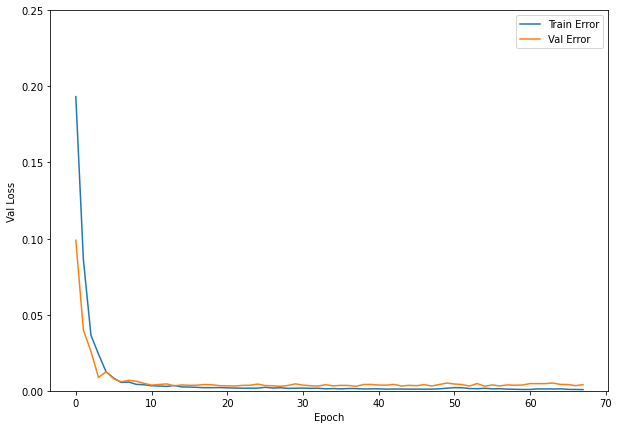

In [196]:
def plot_history(history):
  plt.figure(figsize=(10,7))
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.legend()
  plt.ylim([0,0.4])

  plt.figure(figsize=(10,7))
  plt.xlabel('Epoch')
  plt.ylabel('Val Loss')
  plt.plot(hist['epoch'], hist['loss'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_loss'],
           label = 'Val Error')
  plt.legend()
  plt.ylim([0,0.25])

plot_history(hist)

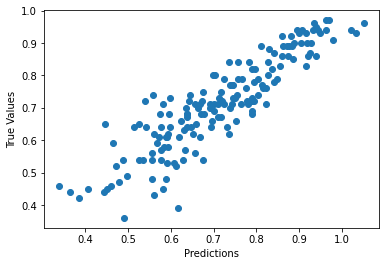

In [198]:
plt.scatter(predicted_values, labels_test)
plt.xlabel('Predictions')
plt.ylabel('True Values')
plt.show()

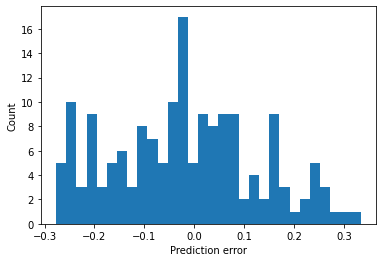

In [177]:
error = predicted_values.flatten() - labels_test
plt.hist(error, bins=30)
plt.xlabel('Prediction error')
plt.ylabel('Count')
plt.show()